In [1]:
# Dependencies and loading data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hp15 = '2015.csv'
hp16 = '2016.csv'
hp17 = '2017.csv'
hp18 = '2018.csv'
hp19 = '2019.csv'
region = 'region.csv'

df15 = pd.read_csv(hp15)
df16 = pd.read_csv(hp16)
df17 = pd.read_csv(hp17)
df18 = pd.read_csv(hp18)
df19 = pd.read_csv(hp19)
dfRe = pd.read_csv(region)

In [2]:
# Dropping unnecessary columns and renaming columns

df15 = df15[['Country', 'Happiness Rank']]
df16 = df16[['Country', 'Happiness Rank']]
df17 = df17[['Country', 'Happiness.Rank']]
df18 = df18[['Country', 'Rank']]
df19 = df19[['Country (region)', 'Ladder']]

df15 = df15.rename(columns = {'Happiness Rank': 'Rank 2015'})
df16 = df16.rename(columns = {'Happiness Rank': 'Rank 2016'})
df17 = df17.rename(columns = {'Happiness.Rank': 'Rank 2017'})
df18 = df18.rename(columns = {'Rank': 'Rank 2018'})
df19 = df19.rename(columns = {'Country (region)': 'Country', 'Ladder': 'Rank 2019'})

In [3]:
# Merging

m1 = pd.merge(df15, df16, on = 'Country', how = 'outer')
m2 = pd.merge(m1, df17, on = 'Country', how = 'outer')
m3 = pd.merge(m2, df18, on = 'Country', how = 'outer')
m4 = pd.merge(m3, df19, on = 'Country', how = 'outer')
m5 = pd.merge(m4, dfRe, on = 'Country', how = 'left')

In [4]:
# Saving for reference

m5.to_csv('m5.csv')

In [5]:
# Summary

df = m5.groupby('Region')
df = df.mean()
df

,Rank 2015,Rank 2016,Rank 2017,Rank 2018,Rank 2019
Region,,,,,
Australia and New Zealand,9.500000,8.500000,9.000000,9.000000,9.500000
Central and Eastern Europe,79.000000,78.448276,75.068966,74.689655,70.965517
Eastern Asia,64.500000,67.166667,64.833333,65.500000,64.833333
Latin America and Caribbean,46.909091,48.333333,50.772727,50.545455,51.380952
Middle East and Northern Africa,77.600000,78.105263,76.421053,80.894737,86.650000
North America,10.000000,9.500000,10.500000,12.500000,14.000000
Southeastern Asia,81.222222,80.000000,73.750000,81.888889,85.111111
Southern Asia,113.142857,111.714286,109.857143,111.714286,115.857143
Sub-Saharan Africa,127.900000,129.657895,127.871795,126.923077,124.923077


In [6]:
# Transposing it for plot

df = df.T
df

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Rank 2015,9.5,79.000000,64.500000,46.909091,77.600000,10.0,81.222222,113.142857,127.900000,29.523810
Rank 2016,8.5,78.448276,67.166667,48.333333,78.105263,9.5,80.000000,111.714286,129.657895,29.190476
Rank 2017,9.0,75.068966,64.833333,50.772727,76.421053,10.5,73.750000,109.857143,127.871795,27.142857
Rank 2018,9.0,74.689655,65.500000,50.545455,80.894737,12.5,81.888889,111.714286,126.923077,25.047619
Rank 2019,9.5,70.965517,64.833333,51.380952,86.650000,14.0,85.111111,115.857143,124.923077,23.380952


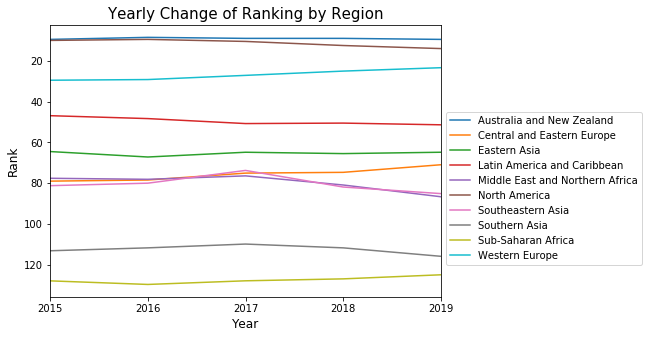

In [7]:
# Plotting regional graph

x_axis = ['2015', '2016', '2017', '2018', '2019']
ticks = np.arange(0, 5, 1)

df.plot(figsize = (7, 5))
plt.gca().invert_yaxis()

plt.title('Yearly Change of Ranking by Region', fontsize = 15)
plt.xticks(ticks = ticks, labels = x_axis)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rank', fontsize = 12)
plt.legend(loc = 'best', bbox_to_anchor = (1, 0.7))

plt.savefig('Ranking_region.png')

plt.show()